## CycleGAN for MRI Style Transfer: Enhancing Diagnostic Imaging through AI


Misdiagnosis in the medical field is a very serious issue but it’s also uncomfortably common to occur. Imaging procedures in the medical field requires an expert radiologist’s opinion since interpreting them is not a simple binary process ( Normal or Abnormal). Even so, one radiologist may see something that another does not. This can lead to conflicting reports and make it difficult to effectively recommend treatment options to the patient.


One of the complicated tasks in medical imaging is to diagnose MRI(Magnetic Resonance Imaging). Sometimes to interpret the scan, the radiologist needs different variations of the imaging which can drastically enhance the accuracy of diagnosis by providing practitioners with a more comprehensive understanding.





But to have access to different imaging is difficult and expensive. With the help of deep learning, we can use style transfer to generate artificial MRI images of different contrast levels from existing MRI scans. This will help to provide a better diagnosis with the help of an additional image.



In this capstone, you will use CycleGAN to translate the style of one MRI image to another, which will help in a better understanding of the scanned image. Using GANs you will create T2 weighted images from T1 weighted MRI image and vice-versa.

### What I am going to Implement:

Going to build a Generative adversarial model(modified U-Net) which can generate artificial MRI images of different contrast levels from existing MRI scans.

### Project pipeline:

The project pipeline can be briefly summarized in the following four steps:

- Data Understanding: Here,I will load the data and create the dataset for it.

- Image Processing: In this step,I will have to process the images using different steps.

- Model-Building and Training: This is the final step at which I will create Generators and Discriminators using a modified U-Net architecture(similar to CycleGAN).I will also define the loss function and training step for model training.


In [8]:
# Install all the necessary libraries
!pip install matplotlib
!pip install scikit-image
!pip install glob
!pip install keras
!pip install imageio

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import imageio
import glob
import os

### Load MRI Dataset

In [10]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Define the paths to the directories containing T1 and T2 MRI images

t1_path = "/content/drive/MyDrive/Style_GAN_MRI/MRI_T1_T2_Dataset/Tr1/TrainT1"  # Path to T1 images
t2_path = "/content/drive/MyDrive/Style_GAN_MRI/MRI_T1_T2_Dataset/Tr2/TrainT2"  # Path to T2 images

# List all the image files in the T1 and T2 directories

t1_images = os.listdir(t1_path)  # Get a list of all T1 image filenames
t2_images = os.listdir(t2_path)  # Get a list of all T2 image filenames

# Display the filename of the third T1 image for validation

print("Filename of the third T1 image:", t1_images[2])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Filename of the third T1 image: Image #45.png


In [11]:
# This step demonstrates how an image looks when read into memory

image_path = os.path.join(t1_path, t1_images[2])  # Construct the full image path
t1_image_array = imageio.imread(image_path)  # Read the image as a NumPy array

# Checking how an image looks like as a numpy array

print(t1_image_array)

<ipython-input-11-b00a44200c86>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  t1_image_array = imageio.imread(image_path)  # Read the image as a NumPy array


[[1 1 1 ... 1 2 1]
 [2 2 2 ... 2 2 2]
 [1 2 2 ... 2 2 1]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [12]:
# Function to read and extract T1 and T2 training images from a specified directory
# This function returns a NumPy array containing all the images.
def extract_images(directory_path, image_filenames):
    """
    Extracts images from the specified directory and returns them as a NumPy array.

    Parameters:
    - directory_path (str): The path to the folder containing the images.
    - image_filenames (list): A list of image filenames to be read.

    Returns:
    - np.ndarray: A NumPy array containing the loaded images.
    """
    img_list = []  # Initialize an empty list to store the images
    for file in image_filenames:
        # Construct the full path to the image file
        img_path = os.path.join(directory_path, file)
        img = imageio.imread(img_path)  # Read the image as a NumPy array
        img_list.append(img)  # Append the image to the list
    return np.asarray(img_list)  # Convert the list of images to a NumPy array


In [13]:
# Load T1 and T2 images using the defined function
t1 = extract_images(t1_path, t1_images)  # Extract T1 images
t2 = extract_images(t2_path, t2_images)  # Extract T2 images

# Print the shapes of the extracted images to understand their dimensions
print('T1 Shape: ', t1.shape)  # Display the shape of T1 images
print('T2 Shape: ', t2.shape)  # Display the shape of T2 images

# Calculate and display the total dataset size
total_size = t1.shape[0] + t2.shape[0]  # Total number of images in the dataset
print('Dataset size: ', total_size)  # Print the total number of images

<ipython-input-12-6fb4884eacd2>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)  # Read the image as a NumPy array


T1 Shape:  (43, 217, 181)
T2 Shape:  (46, 217, 181)
Dataset size:  89


### Findings and Way Forward:

Upon checking the shapes of the extracted datasets, it was observed that the total number of images available may be limited for conventional training.

However, one significant advantage of using Generative Adversarial Networks (GANs) is their ability to generate new images, thereby augmenting the dataset without the need for additional real images. This capability allows us to effectively expand our dataset by generating artificial MRI images of varying contrast levels, improving the model's robustness.

#### Way Forward:
Given the limited number of available training images, the focus will be on leveraging the GAN architecture to generate synthetic MRI images. Instead of relying solely on traditional data augmentation techniques, we can increase the number of training epochs to allow the model to learn better representations. This approach will help in optimizing the performance of the GAN while creating a more comprehensive dataset for training and testing, ultimately enhancing the accuracy and reliability of the MRI image analysis.


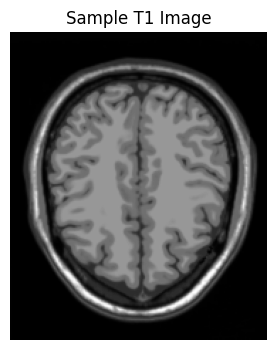

In [14]:
# Visualizing a sample T1 image from the dataset
plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.imshow(t1[2], cmap='gray')  # Display the third T1 image in grayscale
plt.title("Sample T1 Image")  # Add a title for clarity
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()  # Show the plot


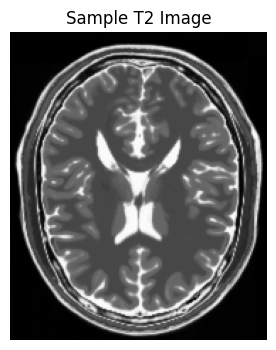

In [15]:
# Visualizing a sample T2 image from the dataset
plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.imshow(t2[2], cmap='gray')  # Display the third T2 image in grayscale
plt.title("Sample T2 Image")  # Add a title for clarity
plt.axis('off')  # Hide the axis for a cleaner look
plt.show()  # Show the plot

The Normalization of T1 and T2 images to the range of
[−1.0,1.0] is an essential step in the preprocessing pipeline. It enhances the model's ability to learn effectively and efficiently while maintaining the integrity of the data's spatial relationships. This foundational step supports improved performance in the subsequent training of the GAN, ultimately contributing to better outcomes in generating high-quality synthetic MRI images.

In [16]:
# Function to normalize image data
def normalize(img):
    """
    Normalizes image pixel values to the range of [-1.0, 1.0].

    Parameters:
    - img (np.ndarray): Input image as a NumPy array.

    Returns:
    - np.ndarray: Normalized image.
    """
    img = (img / 127.5) - 1.0  # Normalize the images to the range of [-1.0, 1.0]
    return img  # Return the normalized image

# Normalize the T1 and T2 images
t1 = normalize(t1)  # Apply normalization to the T1 images
t2 = normalize(t2)  # Apply normalization to the T2 images



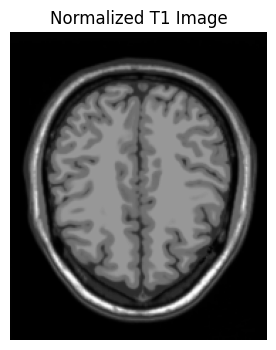

In [17]:
# Visualizing a normalized T1 image
plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.imshow(t1[2], cmap='gray')  # Display the normalized third T1 image in grayscale
plt.title("Normalized T1 Image")  # Add a title for clarity
plt.axis('off')  # Hide the axis for a cleaner presentation
plt.show()  # Show the plot

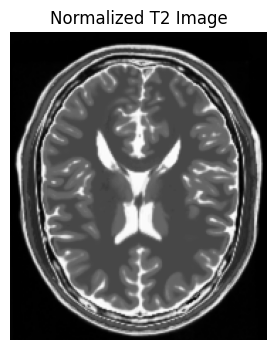

In [18]:
# Visualizing a normalized T2 image
plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.imshow(t2[2], cmap='gray')  # Display the normalized third T2 image in grayscale
plt.title("Normalized T2 Image")  # Add a title for clarity
plt.axis('off')  # Hide the axis for a cleaner presentation
plt.show()  # Show the plot

Checking shapes of T1 and T2 images

In [19]:
t1.shape


(43, 217, 181)

In [20]:
t2.shape

(46, 217, 181)

We have to resize images to (64,64)

### We Are Resizing Images
Standardization of Input Size:

Resizing images to a uniform size (in this case,
64
×
64
64×64) ensures that all input data fed into the model has consistent dimensions.

Reduced Computational Complexity:

Smaller images reduce the amount of computation required during training and inference. This leads to faster processing times and allows for larger batch sizes, improving the efficiency of the training process.

In [21]:
# Function to resize images to (64, 64)
def resize_img(imgs):
    """
    Resizes a batch of images to the specified dimensions (64, 64).

    Parameters:
    - imgs (np.ndarray): Input images as a NumPy array of shape (N, H, W),
                        where N is the number of images, H is the height,
                        and W is the width of the images.

    Returns:
    - np.ndarray: Resized images as a NumPy array of shape (N, 64, 64).
    """
    # Initialize an array to hold resized images
    img_resized = np.zeros((imgs.shape[0], 64, 64))  # Create an array to store resized images
    for index, img in enumerate(imgs):
        # Resize each image to (64, 64)
        img_resized[index, :, :] = resize(img, (64, 64), anti_aliasing=True)
    return img_resized  # Return the array of resized images

# Resizing T1 and T2 images
t1_resized = resize_img(t1)  # Resize the T1 images
t2_resized = resize_img(t2)  # Resize the T2 images

# Print shapes of resized images
print('T1 Shape: ', t1_resized.shape)  # Display the shape of the resized T1 images
print('T2 Shape: ', t2_resized.shape)  # Display the shape of the resized T2 images

T1 Shape:  (43, 64, 64)
T2 Shape:  (46, 64, 64)


We have 43 T1 images and 46 T2 images, all uniformly resized to
64
×
64 pixels.
This uniformity in dimensions is crucial for feeding the images into a machine learning model, ensuring that the model can handle batches of data without encountering size mismatches.

In [22]:
# Reshape Images to (64, 64, 1) with float pixel values
t1_resized = t1_resized.reshape(t1_resized.shape[0], 64, 64, 1).astype('float32')  # Reshape T1 images
t2_resized = t2_resized.reshape(t2_resized.shape[0], 64, 64, 1).astype('float32')  # Reshape T2 images




Explanation of reshaping Images to (64, 64, 1):

Purpose of Reshaping:

Channel Dimension: By adding a third dimension, we explicitly define the channel of the image. For grayscale images (like the T1 and T2 MRI scans), this dimension is set to 1. Most neural network frameworks require a channel dimension for image processing.

Consistency Across Datasets: Ensuring all images have the same shape allows for efficient batch processing, which is essential for training models effectively.

Floating Point Conversion: Converting pixel values to float32 is vital for numerical stability during training. Neural networks often perform calculations using floating-point arithmetic, and using this data type allows for greater precision, which is crucial for optimization algorithms.

### Batching and Shuffling Data:

### Batching:

The use of a batch size (set to 32 here) allows the model to process multiple images simultaneously during training. This is beneficial for a few reasons:

Efficiency: Batch processing makes better use of memory and computational resources, speeding up the training process.

Gradient Estimation: Using batches helps in estimating the gradient more reliably, leading to improved model convergence.

### Shuffling:

Shuffling the dataset before training is a best practice as it prevents the model from learning the order of the data. This randomness helps the model generalize better and reduces the risk of overfitting to the training data. The seed parameter ensures that the shuffling is reproducible across runs.

In [23]:
#batch and shuffle the data

BATCH_SIZE = 32  # Define batch size
t1_resized = tf.data.Dataset.from_tensor_slices(t1_resized).shuffle(t1_resized.shape[0], seed=42).batch(BATCH_SIZE)  # Create T1 dataset
t2_resized = tf.data.Dataset.from_tensor_slices(t2_resized).shuffle(t2_resized.shape[0], seed=42).batch(BATCH_SIZE)  # Create T2 dataset


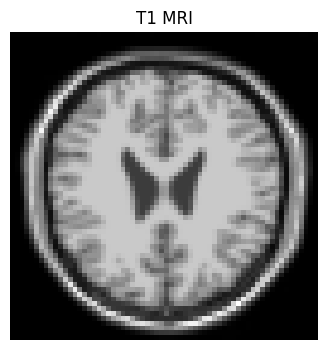

In [24]:
# Randomly visualizing resized images
# Fetch a sample batch of T1 images from the dataset
t1_sample = next(iter(t1_resized))  # Get the next batch of resized T1 images

# Plotting the first image from the sample batch

plt.figure(figsize=(4, 4))  # Set the figure size for better visibility
plt.imshow(t1_sample[0].numpy()[:, :, 0], cmap='gray')  # Display the first T1 image in grayscale
plt.title('T1 MRI')  # Add a title for clarity
plt.axis('off')  # Hide the axis for a cleaner presentation
plt.show()  # Show the plot

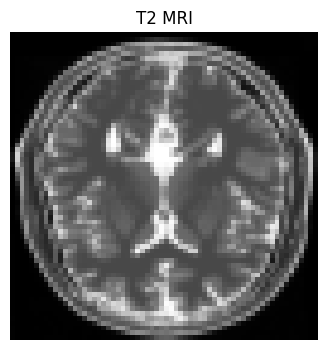

In [25]:
# Randomly visualize a resized T2 MRI image
# Retrieve a sample batch from the T2 dataset
t2_sample = next(iter(t2_resized))  # Get the first batch from the dataset

# Create a figure for visualization
plt.figure(figsize=(4, 4))  # Set the size of the figure

# Display the first image in the sampled batch
# Use .numpy() to convert the tensor to a NumPy array, and access the first channel
plt.imshow(t2_sample[0].numpy()[:, :, 0], cmap='gray')  # Display the image in grayscale

# Add a title to the plot
plt.title('T2 MRI')  # Title for the displayed image

# Turn off the axis for better visualization
plt.axis('off')  # Hide the axis

# Show the plot
plt.show()  # Display the figure

## Model Building

In [26]:
# Class to implement instance normalization on images

class InstanceNormalization(tf.keras.layers.Layer):
    """
    Instance Normalization Layer for TensorFlow.

    This layer normalizes each instance in the input batch individually,
    which is particularly useful for style transfer tasks.
    """

    # Initialization of Objects
    def __init__(self, epsilon=1e-5):
        """
        Initializes the InstanceNormalization layer.

        Parameters:
        - epsilon (float): Small constant to prevent division by zero during normalization.
        """
        # Calling the parent class's initializer
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon  # Set the epsilon value to avoid numerical instability

    def build(self, input_shape):
        """
        Builds the weights of the layer based on the input shape.

        Parameters:
        - input_shape (TensorShape): The shape of the input tensor.
        """
        # Create a trainable scale parameter with the same size as the last dimension of input_shape
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),  # Initialize with mean 1 and stddev 0.02
            trainable=True)  # This parameter will be updated during training

        # Create a trainable offset parameter (bias) with the same size as the last dimension of input_shape
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',  # Initialize to zero
            trainable=True)  # This parameter will also be updated during training

    def call(self, x):
        """
        Applies instance normalization to the input tensor.

        Parameters:
        - x (Tensor): Input tensor to be normalized.

        Returns:
        - Tensor: Normalized output tensor after applying scale and offset.
        """
        # Compute Mean and Variance, Axes=[1, 2] ensures Instance Normalization
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)  # Calculate mean and variance for each instance

        # Calculate the inverse of the standard deviation
        inv = tf.math.rsqrt(variance + self.epsilon)  # Add epsilon to prevent division by zero

        # Normalize the input tensor
        normalized = (x - mean) * inv  # Normalize using the computed mean and variance

        # Apply scale and offset to the normalized output
        return self.scale * normalized + self.offset


Explanation of Each Component:

Class Definition:

class InstanceNormalization(tf.keras.layers.Layer) defines a custom Keras layer for instance normalization, which is particularly useful in tasks like style transfer where we want to normalize features for each instance independently.

Initialization (__init__ method):

The __init__ method initializes the layer. The epsilon parameter prevents division by zero during normalization.
super(InstanceNormalization, self).__init__() calls the parent class's constructor to ensure proper initialization of the Keras layer.

Building the Layer (build method):

The build method defines the trainable parameters of the layer (scale and offset) based on the input shape.
self.scale and self.offset are initialized as trainable weights, where scale is initialized with a normal distribution centered at 1 (to maintain the input distribution) and offset is initialized to zero (to allow for adjustments).

Normalization Logic (call method):

The call method implements the normalization logic: It calculates the mean and variance of the input tensor across spatial dimensions (height and width), which allows each instance to be normalized separately.

The inverse standard deviation (inv) is computed to scale the normalized values.

Finally, it applies the scale and offset to the normalized values, allowing the model to learn how to adjust the normalized output, enhancing flexibility during training.

In [27]:
# Downsampling method: Leads to reduction in dimensions, achieved with convolutions

def downsample(filters, size, apply_norm=True):
    """
    Creates a downsampling block using Conv2D, InstanceNormalization, and LeakyReLU.

    Parameters:
    - filters (int): The number of filters for the Conv2D layer.
    - size (int): The size of the convolutional kernel.
    - apply_norm (bool): Whether to apply instance normalization after convolution.

    Returns:
    - tf.keras.Sequential: A Sequential model representing the downsampling block.
    """
    # Initialize weights using a normal distribution with mean 0 and standard deviation 0.02
    initializer = tf.random_normal_initializer(0., 0.02)

    # Create a Sequential model for downsampling
    result = tf.keras.Sequential()

    # Add Conv2D layer for downsampling
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))

    # Add Normalization layer if specified
    if apply_norm:
        result.add(InstanceNormalization())

    # Add Leaky ReLU activation function
    result.add(tf.keras.layers.LeakyReLU())

    return result  # Return the downsampling block


Explanation of Each Component:

Function Definition:

The downsample function is designed to create a downsampling block that reduces the spatial dimensions of input images. It typically includes a convolutional layer, an optional normalization layer, and an activation function.

Parameters:

filters: The number of filters (or feature maps) for the convolutional layer, determining the output depth.
size: The size of the convolutional kernel (e.g., 3 for a 3x3 kernel).
apply_norm: A boolean flag indicating whether to apply instance normalization after the convolutional layer.

Weight Initialization:

initializer = tf.random_normal_initializer(0., 0.02) initializes the weights of the convolutional layer using a normal distribution with a mean of 0 and a standard deviation of 0.02. This helps in preventing saturation during training.

Sequential Model Creation:

result = tf.keras.Sequential() initializes a Sequential model, allowing layers to be stacked sequentially.

Convolutional Layer:

The line result.add(tf.keras.layers.Conv2D(...)) adds a 2D convolutional layer to the model. The parameters are:

filters: Number of filters specified.
size: Size of the convolutional kernel.
strides=2: The convolution operation will downsample the input by a factor of 2.
padding='same': Ensures that the output dimensions match the input dimensions (after considering stride).
use_bias=False: The convolutional layer will not use a bias term, as normalization will handle any shifts.

Normalization Layer:

If apply_norm is True, the line result.add(InstanceNormalization()) adds an instance normalization layer, which normalizes the output of the convolution. This is particularly useful in tasks like style transfer, as it helps maintain consistent feature distributions.

Activation Function:

The line result.add(tf.keras.layers.LeakyReLU()) adds a Leaky ReLU activation function to introduce non-linearity into the model. Leaky ReLU allows a small gradient when the unit is not active, which helps mitigate the vanishing gradient problem.
Return Statement:

Finally, return result returns the constructed downsampling block, which can be used in larger model architectures.

In [28]:
# Upsampling method: Achieved with Conv2DTranspose

def upsample(filters, size, apply_dropout=False):
    """
    Creates an upsampling block using Conv2DTranspose, InstanceNormalization, and ReLU.

    Parameters:
    - filters (int): The number of filters for the Conv2DTranspose layer.
    - size (int): The size of the convolutional kernel.
    - apply_dropout (bool): Whether to apply dropout for regularization.

    Returns:
    - tf.keras.Sequential: A Sequential model representing the upsampling block.
    """
    # Initialize weights using a normal distribution with mean 0 and standard deviation 0.02
    initializer = tf.random_normal_initializer(0., 0.02)

    # Create a Sequential model for upsampling
    result = tf.keras.Sequential()

    # Add Transposed Conv2D layer for upsampling
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))

    # Add Normalization layer
    result.add(InstanceNormalization())

    # Conditionally add Dropout layer for regularization
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))  # 50% dropout rate

    # Add ReLU activation function
    result.add(tf.keras.layers.ReLU())

    return result  # Return the upsampling block


In [29]:
# U-Net Generator: A combination of Convolution + Transposed Convolution Layers
def unet_generator():
    """
    Creates a U-Net generator model for image-to-image translation.

    Returns:
    - tf.keras.Model: A U-Net generator model.
    """

    # Downsampling stack: Each entry reduces spatial dimensions while increasing depth
    down_stack = [
        downsample(128, 4, False),  # (batch_size, 32, 32, 128)
        downsample(256, 4),          # (batch_size, 16, 16, 256)
        downsample(256, 4),          # (batch_size, 8, 8, 256)
        downsample(256, 4),          # (batch_size, 4, 4, 256)
        downsample(256, 4),          # (batch_size, 2, 2, 256)
        downsample(256, 4)           # (batch_size, 1, 1, 256)
    ]

    # Upsampling stack: Each entry increases spatial dimensions while decreasing depth
    up_stack = [
        upsample(256, 4, True),      # (batch_size, 2, 2, 256)
        upsample(256, 4, True),      # (batch_size, 4, 4, 256)
        upsample(256, 4),            # (batch_size, 8, 8, 256)
        upsample(256, 4),            # (batch_size, 16, 16, 256)
        upsample(128, 4)             # (batch_size, 32, 32, 128)
    ]

    # Initializing weights with a normal distribution for the last layer
    initializer = tf.random_normal_initializer(0., 0.02)

    # Last transposed convolution layer to produce the final output
    last = tf.keras.layers.Conv2DTranspose(
        1, 4, strides=2, padding='same',
        kernel_initializer=initializer,
        activation='tanh'  # Output layer activation function
    )  # (batch_size, 64, 64, 1)

    # Concatenation layer to merge skip connections
    concat = tf.keras.layers.Concatenate()

    # Input layer for the model
    inputs = tf.keras.layers.Input(shape=[64, 64, 1])
    x = inputs

    # Downsampling through the model
    skips = []  # List to hold skip connections
    for down in down_stack:
        x = down(x)  # Apply downsampling layers
        skips.append(x)  # Store the output for skip connection

    skips = reversed(skips[:-1])  # Reverse the skip connections (omit the last one)

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)  # Apply upsampling layer
        x = concat([x, skip])  # Concatenate with the corresponding skip connection

    x = last(x)  # Final output layer
    return tf.keras.Model(inputs=inputs, outputs=x)  # Return the U-Net model


### Creating Generator Instances:



In [30]:
# Create two instances of the U-Net generator
generator_g = unet_generator()  # Generator for T1 to T2 translation
generator_f = unet_generator()  # Generator for T2 to T1 translation

# Display the summary of the generator model
generator_g.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 32, 32, 128)    │          2,048 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 16, 16, 256)    │        524,800 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 8, 8, 256)      │      1,049,088 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 4, 4, 256)      │      1,049,088 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 2, 2, 256)      │      1,049,088 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 1, 1, 256)      │      1,049,088 │ sequential_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 2, 2, 256)      │      1,049,088 │ sequential_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 256)    │              0 │ sequential_6[0][0],    │
│                           │                        │                │ sequential_4[0][0],    │
│                           │                        │                │ sequential_7[0][0],    │
│                           │                        │                │ sequential_3[0][0],    │
│                           │                        │                │ sequential_8[0][0],    │
│                           │                        │                │ sequential_2[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_1[0][0],    │
│                           │                        │                │ sequential_10[0][0],   │
│                           │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 4, 4, 256)      │      2,097,664 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 8, 8, 256)      │      2,097,664 │ concatenate[1][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 16, 16, 256)    │      2,097,664 │ concatenate[2][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 32, 32, 128)    │      1,048,832 │ concatenate[3][0]      │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_5        │ (None, 64, 64, 1)      │          4,097 │ concatenate[4][0]      │
│ (Conv2DTranspose)         │                        │                │                        │
└──────────────────────

 Total params: 13,118,209 (50.04 MB)

 Trainable params: 13,118,209 (50.04 MB)

 Non-trainable params: 0 (0.00 B)

Generator_g and generator_f are both instances of the U-Net generator model.

The unet_generator() function is called twice, creating two separate generator networks.

Each generator can be used for translating images from one domain to another (e.g., generator_g could be used to convert T1-weighted MRI images to T2-weighted MRI images, while generator_f could do the reverse).

#### Model Summary:

The summary() method provides a detailed overview of the architecture of generator_g.

This summary includes the layer types, output shapes, and the number of parameters in each layer, which helps in understanding the model's structure and complexity.

### Creating Descriminator Defination:

In [31]:
# Discriminator model definition
def discriminator():
    """
    Builds a discriminator model that utilizes convolutional layers for image classification.

    The model consists of several downsampling layers followed by instance normalization and Leaky ReLU activations.

    Returns:
    - tf.keras.Model: A Keras model that predicts whether an input image is real or fake.
    """

    initializer = tf.random_normal_initializer(0., 0.02)  # Initializer for convolution weights

    # Input layer that accepts images of shape (64, 64, 1)
    inp = tf.keras.layers.Input(shape=[64, 64, 1], name='input_image')
    x = inp  # Start with the input

    # Downsampling layers to reduce spatial dimensions while increasing feature maps
    down1 = downsample(128, 4, False)(x)  # Output shape: (bs, 32, 32, 128)
    down2 = downsample(256, 4)(down1)      # Output shape: (bs, 16, 16, 256)

    # Padding to maintain spatial dimensions before the next convolution
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down2)  # Output shape: (bs, 18, 18, 256)

    # Convolutional layer to further process features
    conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1)  # Output shape: (bs, 15, 15, 512)

    # Instance normalization and activation
    norm1 = InstanceNormalization()(conv)  # Normalize the features
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)  # Activation function to introduce non-linearity

    # Another padding layer to prepare for the final convolution
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # Output shape: (bs, 17, 17, 512)

    # Final convolutional layer to output the classification score
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2)  # Output shape: (bs, 14, 14, 1)

    # Return the complete model with input and output defined
    return tf.keras.Model(inputs=inp, outputs=last)


In [32]:
# Create two discriminators for the CycleGAN
discriminator_x = discriminator()  # Discriminator for T1 images
discriminator_y = discriminator()  # Discriminator for T2 images

# Print the summary of discriminator_x to understand its architecture
discriminator_x.summary()


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_22 (Sequential)           │ (None, 32, 32, 128)         │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_23 (Sequential)           │ (None, 16, 16, 256)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d (ZeroPadding2D)       │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 15, 15, 512)         │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_21            │ (None, 15, 15, 512)         │           1,024 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 17, 17, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 1)           │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,633,217 (10.04 MB)

 Trainable params: 2,633,217 (10.04 MB)

 Non-trainable params: 0 (0.00 B)

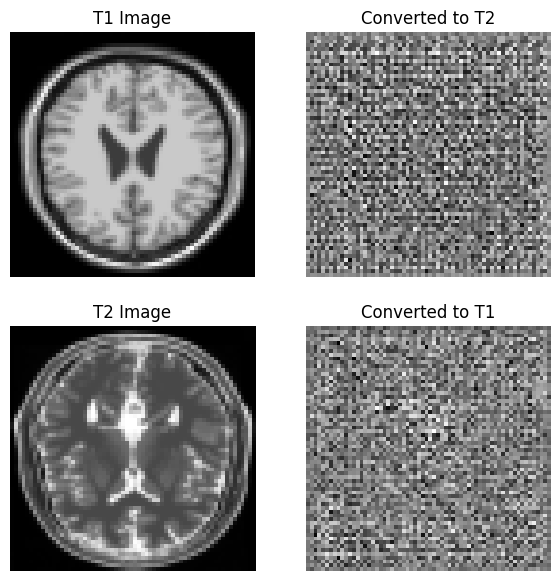

In [33]:
# Generate outputs from the untrained generator models
# The output should reflect random noise at this stage
conv_to_t2 = generator_g(t1_sample)  # Generate T2 image from T1 sample
conv_to_t1 = generator_f(t2_sample)  # Generate T1 image from T2 sample

# Set up a figure for visualization
plt.figure(figsize=(7, 7))

# Prepare images and titles for visualization
imgs = [t1_sample, conv_to_t2, t2_sample, conv_to_t1]
title = ['T1 Image', 'Converted to T2', 'T2 Image', 'Converted to T1']

# Loop through images and display them in a grid
for i in range(len(imgs)):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each image
    plt.title(title[i])        # Set the title for each subplot
    plt.imshow(imgs[i][0].numpy()[:, :, 0], cmap='gray')  # Display the image
    plt.axis('off')           # Hide the axis

# Show the final plot
plt.show()


### Creating loss objects and functions

#### Binary Cross-Entropy Loss:

Used for classification tasks, this loss function helps the discriminator evaluate how well it can distinguish between real and generated (fake) images.
from_logits=True indicates that the outputs from the model are logits, which allows the loss function to apply the sigmoid activation internally.
#### Discriminator Loss:

This function computes the loss for both real and generated images.
For real images, the expected label is 1 (indicating they are real), and for generated images, it is 0 (indicating they are fake).
The final loss is the average of the real and generated losses, ensuring balanced learning.

#### Generator Loss:

The generator aims to fool the discriminator into thinking that the generated images are real.
The loss is calculated based on the discriminator's output for the generated images, which should ideally be close to 1.

#### Cycle Loss:

This loss enforces cycle consistency in the image translation process, ensuring that when an image is translated to another domain and back, it should resemble the original image.
The L1 loss is used to measure the absolute differences between the original and the cycled images, scaled to emphasize its importance.

#### Identity Loss:

The identity loss ensures that if an image is passed through the generator without requiring any transformation, it should remain unchanged.
This is particularly useful in scenarios where certain images don't need to be transformed, helping maintain the original image's integrity.

In [34]:
# Creating loss objects and functions

# Classification loss for the discriminator: Binary Cross-Entropy Loss
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator Loss: Combines the loss from real and generated images
def discriminator_loss(real, generated):
    """
    Calculate the total discriminator loss.

    Parameters:
    - real (tf.Tensor): The output from the discriminator for real images.
    - generated (tf.Tensor): The output from the discriminator for generated images.

    Returns:
    - float: The combined discriminator loss.
    """
    # Calculate the loss for real images (should be labeled as 1)
    real_loss = loss_obj(tf.ones_like(real), real)
    # Calculate the loss for generated images (should be labeled as 0)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    # Total discriminator loss is the mean of the two losses
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5  # Return mean of losses

# Generator Loss: Measures how well the generator deceives the discriminator
def generator_loss(generated):
    """
    Calculate the generator loss.

    Parameters:
    - generated (tf.Tensor): The output from the discriminator for generated images.

    Returns:
    - float: The generator loss.
    """
    return loss_obj(tf.ones_like(generated), generated)  # Loss is based on how close generated is to 1

# Cycle Loss: Ensures the image can be reconstructed back to the original
def calc_cycle_loss(real_image, cycled_image):
    """
    Calculate the cycle consistency loss.

    Parameters:
    - real_image (tf.Tensor): The original image.
    - cycled_image (tf.Tensor): The image after going through both generators.

    Returns:
    - float: The cycle loss value.
    """
    # Compute the mean absolute error between the original and cycled images
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return 10.0 * loss1  # Scale the loss to emphasize cycle consistency

# Identity Loss: Ensures that if an image is passed through a generator without transformation,
# it should remain unchanged
def identity_loss(real_image, same_image):
    """
    Calculate the identity loss.

    Parameters:
    - real_image (tf.Tensor): The original image.
    - same_image (tf.Tensor): The output from the generator when no transformation is needed.

    Returns:
    - float: The identity loss value.
    """
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return 0.5 * loss  # Scale the identity loss


In [35]:
# Leveraging Adam Optimizer to smoothen gradient descent
# The Adam optimizer is known for its efficiency in handling sparse gradients and adapting the learning rate

# Initialize Adam optimizers for both generators with a learning rate of 2e-4 and beta_1 set to 0.5
generator_g_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

# Initialize Adam optimizers for both discriminators with the same parameters
discriminator_x_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

# Set the number of epochs for training
EPOCHS = 300


In [36]:
# Initialize checkpoints to save models
# This path is where the trained models will be saved for later restoration or evaluation
checkpoint_path = "./Trained_Model"

# Create a TensorFlow checkpoint object that includes the generators, discriminators, and their optimizers
ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

# Set up a checkpoint manager to manage the checkpoints
# max_to_keep specifies the maximum number of checkpoints to keep; older checkpoints will be deleted
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# Check if there are existing checkpoints and restore the latest one if it exists
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

# Definition to show generated output whilst training
def generate_images(model1, test_input1, model2, test_input2, epoch):
    """
    Generates and saves images from the generator models during training.

    Parameters:
    - model1: The first generator model (e.g., generator_g).
    - test_input1: Input image for the first model.
    - model2: The second generator model (e.g., generator_f).
    - test_input2: Input image for the second model.
    - epoch: The current epoch number for saving the image with a timestamp.
    """
    # Generate predictions for the given test inputs
    prediction1 = model1(test_input1)  # Generate output from the first generator
    prediction2 = model2(test_input2)  # Generate output from the second generator

    # Set up a figure for visualization
    plt.figure(figsize=(8, 4))
    display_list = [test_input1[0], prediction1[0], test_input2[0], prediction2[0]]
    title = ['Input Image', 'Generated Image', 'Input Image', 'Generated Image']

    # Plot the images in a grid
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i].numpy()[:, :, 0], cmap='gray')  # Display the images in grayscale
        plt.axis('off')  # Hide the axis

    # Save the generated images to a file with the current epoch number
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()  # Display the generated images


In [37]:
# Defining Training Function
@tf.function  # This decorator compiles the function into a callable TensorFlow graph for faster execution

def train_step(real_x, real_y):
    """
    Performs one training step for the CycleGAN.

    Parameters:
    - real_x: Real images from domain X.
    - real_y: Real images from domain Y.
    """
    # Use a persistent GradientTape to compute gradients multiple times
    with tf.GradientTape(persistent=True) as tape:
        # Forward pass through generators
        fake_y = generator_g(real_x, training=True)  # G: X -> Y
        cycled_x = generator_f(fake_y, training=True)  # F: Y -> X (reconstruction)

        fake_x = generator_f(real_y, training=True)  # F: Y -> X
        cycled_y = generator_g(fake_x, training=True)  # G: X -> Y (reconstruction)

        # Identity mapping for identity loss
        same_x = generator_f(real_x, training=True)  # F: X -> X
        same_y = generator_g(real_y, training=True)  # G: Y -> Y

        # Forward pass through discriminators
        disc_real_x = discriminator_x(real_x, training=True)  # D_X for real images
        disc_real_y = discriminator_y(real_y, training=True)  # D_Y for real images

        disc_fake_x = discriminator_x(fake_x, training=True)  # D_X for fake images
        disc_fake_y = discriminator_y(fake_y, training=True)  # D_Y for fake images

        # Calculate generator losses
        gen_g_loss = generator_loss(disc_fake_y)  # Loss for generator G
        gen_f_loss = generator_loss(disc_fake_x)  # Loss for generator F

        # Calculate cycle loss
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

        # Total generator loss combining BCE loss, cycle loss, and identity loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        # Calculate discriminator losses
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)  # D_X loss
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)  # D_Y loss

    # Calculate the gradients for generators and discriminators
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)

    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)

    # Apply the gradients to the optimizers
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))

    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))


# Verify if GPU is set as the default device for training
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



### Training the CycleGAN Model

In [38]:
import time  # Import the time module

# Start timing
start_time = time.time()

# Start training for the specified number of epochs
for epoch in range(1, EPOCHS + 1):
    for image_x, image_y in tf.data.Dataset.zip((t1_resized, t2_resized)):
        train_step(image_x, image_y)

    # Pass the epoch number to the generate_images function
    generate_images(generator_g, t1_sample, generator_f, t2_sample, epoch)

    # Save the current model checkpoint
    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

# End timing
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")


Output hidden; open in https://colab.research.google.com to view.

In [39]:
# Define the filename for the output GIF
anim_file = 'Style_GAN_mri.gif'

# Create a GIF from the generated images
with imageio.get_writer(anim_file, mode='I') as writer:
    # Get all image filenames that match the pattern
    filenames = glob.glob('image*.png')
    # Sort the filenames to maintain the correct order
    filenames = sorted(filenames)

    # Append each image to the GIF
    for filename in filenames:
        image = imageio.imread(filename)  # Read the image
        writer.append_data(image)  # Append to the GIF

!pip install git+https://github.com/tensorflow/docs

<ipython-input-39-9df71b761379>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)  # Read the image


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-aw_mtn13
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-aw_mtn13
  Resolved https://github.com/tensorflow/docs to commit 344f0e9c1d12a7c8127ae5359f485c462e18854b
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.10.14.18741-py3-none-any.whl size=182607 sha256=6b03baf73cd07f4ef7df5f010200bff56522e6583cff35389570768b0c5d5b54
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2geosvo/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [40]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

Output hidden; open in https://colab.research.google.com to view.